In [1]:
from Bio import Entrez, SeqIO
Entrez.email = "" 
handle = Entrez.efetch(db="nucleotide", id="MN908947", rettype="gb", retmode="text")
recs = list(SeqIO.parse(handle, 'gb'))
handle.close()

In [2]:
recs

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])]

In [3]:
covid_dna = recs[0].seq

In [4]:
covid_dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [5]:
print(f'The genome of Covid-19 consists of {len(covid_dna)} nucleotides.')

The genome of Covid-19 consists of 29903 nucleotides.


In [6]:
# molecular weight
from Bio.SeqUtils import molecular_weight
molecular_weight(covid_dna)

9241219.214400413

In [7]:
# GC content - higher GC content implies more stable molecule due to G and C forming triple hydrogen bonds
from Bio.SeqUtils import GC
GC(covid_dna)

37.97277865097148

In [9]:
count_nucleotides = {
    'A': covid_dna.count('A'),
    'T': covid_dna.count('T'),
    'C': covid_dna.count('C'),
    'G': covid_dna.count('G')
}

In [10]:
count_nucleotides

{'A': 8954, 'T': 9594, 'C': 5492, 'G': 5863}

Text(0.5, 1.0, 'Nucleotide Frequency')

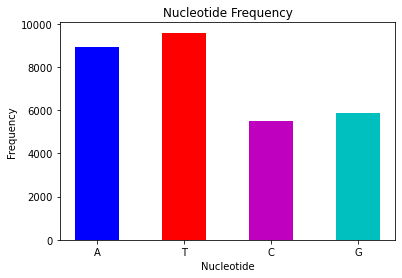

In [11]:
import matplotlib.pyplot as plt
width = 0.5
plt.bar(count_nucleotides.keys(), count_nucleotides.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequency')

In [12]:
covid_mrna = covid_dna.transcribe()
covid_mrna

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA')

In [13]:
covid_aa = covid_mrna.translate()
covid_aa

/home/user/anaconda3/lib/python3.9/site-packages/Bio/Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [14]:
#most common amino acids
from collections import Counter
common_amino = Counter(covid_aa)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

Text(0.5, 1.0, 'Protein Sequence Frequency')

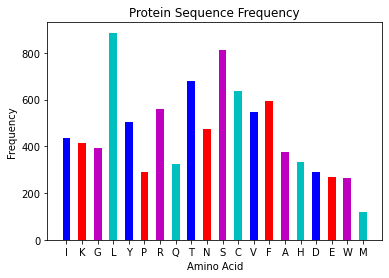

In [15]:
del common_amino['*']

width = 0.5
plt.bar(common_amino.keys(), common_amino.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Protein Sequence Frequency')

In [16]:
print(f"Covid-19's genome has {sum(common_amino.values())} amino acids")

Covid-19's genome has 9193 amino acids


In [17]:
proteins = covid_aa.split('*')

In [18]:
proteins[:5]

[Seq('IKGLYLPR'),
 Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('CTHAV'),
 Seq('LITNYCR')]

In [19]:
print(f'We have {len(proteins)} amino acids in the covid-19 genome')

We have 775 amino acids in the covid-19 genome


In [20]:
for protein in proteins:
    if len(protein) < 20:
        proteins.remove(protein)

In [21]:
print(f'We have {len(proteins)} proteins with more than 20 amino acids in the covid-19 genome')

We have 409 proteins with more than 20 amino acids in the covid-19 genome


In [23]:
top_5_proteins = sorted(proteins, key = len)

In [25]:
top_5_proteins[-1]

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [26]:
len(top_5_proteins[-1])

2701

In [29]:
with open("protein_seq.fasta", "w") as file:
    file.write(f">covid protein\n{top_5_proteins[-1]}")